In [9]:
# classification_report


# confusion_matrix(y_true, y_pred)
# accuracy_score(y_true, y_pred)
# precision_score(y_true, y_pred)
# recall_score(y_true, y_pred)
# fbeta_score(y_true, y_pred, beta)
# f1_score(y_true, y_pred)
# classfication_report(y_true, y_pred)
# roc_curve
# auc

import pandas as pd
import numpy as np

import sklearn
print('sklearn: %s' % sklearn.__version__)


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

# create and configure model



X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)
#-----------------------------------
# model = LogisticRegression().fit(X, y)
model = LogisticRegression(solver='liblinear').fit(X, y)
# model = LogisticRegression(solver='lbfgs').fit(X, y)
#-----------------------------------

y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)
print(df)

sklearn: 0.22.2.post1
           f  y_hat    y
0   0.244729    1.0  0.0
1   1.482220    1.0  1.0
2  -1.526433    0.0  0.0
3   1.035662    1.0  1.0
4   1.861485    1.0  1.0
5  -4.148556    0.0  0.0
6  -1.153074    0.0  0.0
7  -1.332066    0.0  0.0
8   1.447944    1.0  1.0
9  -0.582239    0.0  0.0
10 -1.027759    0.0  1.0
11 -0.878385    0.0  0.0
12 -0.063016    0.0  1.0
13  1.432822    1.0  1.0
14 -2.175147    0.0  0.0
15  2.167628    1.0  1.0


In [11]:
matrix = confusion_matrix(y, y_hat, labels=[1, 0])
print('confusion matrix: ')
print(matrix)

confusion matrix: 
[[6 2]
 [1 7]]


In [12]:
recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.75
fallout = 0.125


In [6]:
from sklearn.metrics import roc_curve
# 1) 
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds
# 또는 
# 2) 
# fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
# fpr, tpr, thresholds

print('fpr: ')
print(fpr)
print('tpr:')
print(tpr)
print('thresholds:')
print(thresholds)

fpr: 
[0.    0.    0.    0.125 0.125 0.375 0.375 1.   ]
tpr:
[0.    0.125 0.75  0.75  0.875 0.875 1.    1.   ]
thresholds:
[ 3.16762769  2.16762769  1.03566193  0.24472855 -0.06301587 -0.87838516
 -1.02775912 -4.14855612]


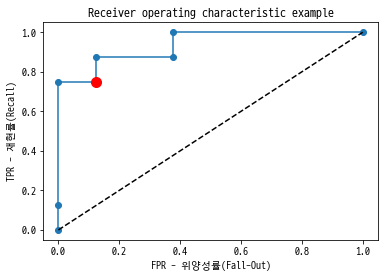

In [5]:
#----------------------------------
# ROC curve
import matplotlib.pyplot as plt

plt.rc('font', family="D2Coding")
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('FPR - 위양성률(Fall-Out)')
plt.ylabel('TPR - 재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()